In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [119]:
data = pd.read_csv("AQI and Lat Long of Countries.csv")

# ****A. SUPERVISED LEARNING****

## ****A1. KLASIFIKASI****

##### **SUPPORT VECTOR CLASSFIER (SVM)**

In [120]:
X = data[['AQI Value', 'Ozone AQI Value']]
y = data['PM2.5 AQI Category']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### **SCALING**

In [122]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [123]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

##### **TRAIN MODEL**

In [124]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [125]:
y_prediksi = svm.predict(X_test)

## ****A2. HASIL PREDIKSI****

##### **CONFUSION MATRIX**

In [126]:
cm =confusion_matrix(y_test, y_prediksi)
cm

array([[1529,    0,   85,    0,    0,    0],
       [   0,    6,    0,    0,    0,    3],
       [  71,    0, 1319,    3,    1,    0],
       [   0,    0,    0,  151,    0,    0],
       [   0,    0,   34,   25,   90,    0],
       [   0,    0,    0,   16,    0,    6]], dtype=int64)

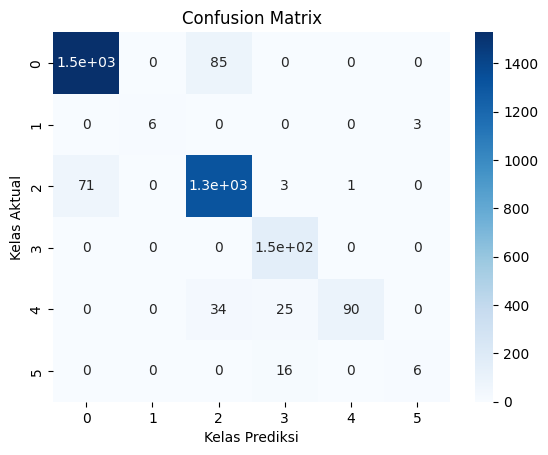

In [127]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()

In [128]:
accuracy = accuracy_score(y_test, y_prediksi)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_prediksi))

Accuracy: 0.9287211740041929
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1614
           1       1.00      0.67      0.80         9
           2       0.92      0.95      0.93      1394
           3       0.77      1.00      0.87       151
           4       0.99      0.60      0.75       149
           5       0.67      0.27      0.39        22

    accuracy                           0.93      3339
   macro avg       0.88      0.74      0.78      3339
weighted avg       0.93      0.93      0.93      3339



## ****A3. PLOT HASIL PREDIKSI****

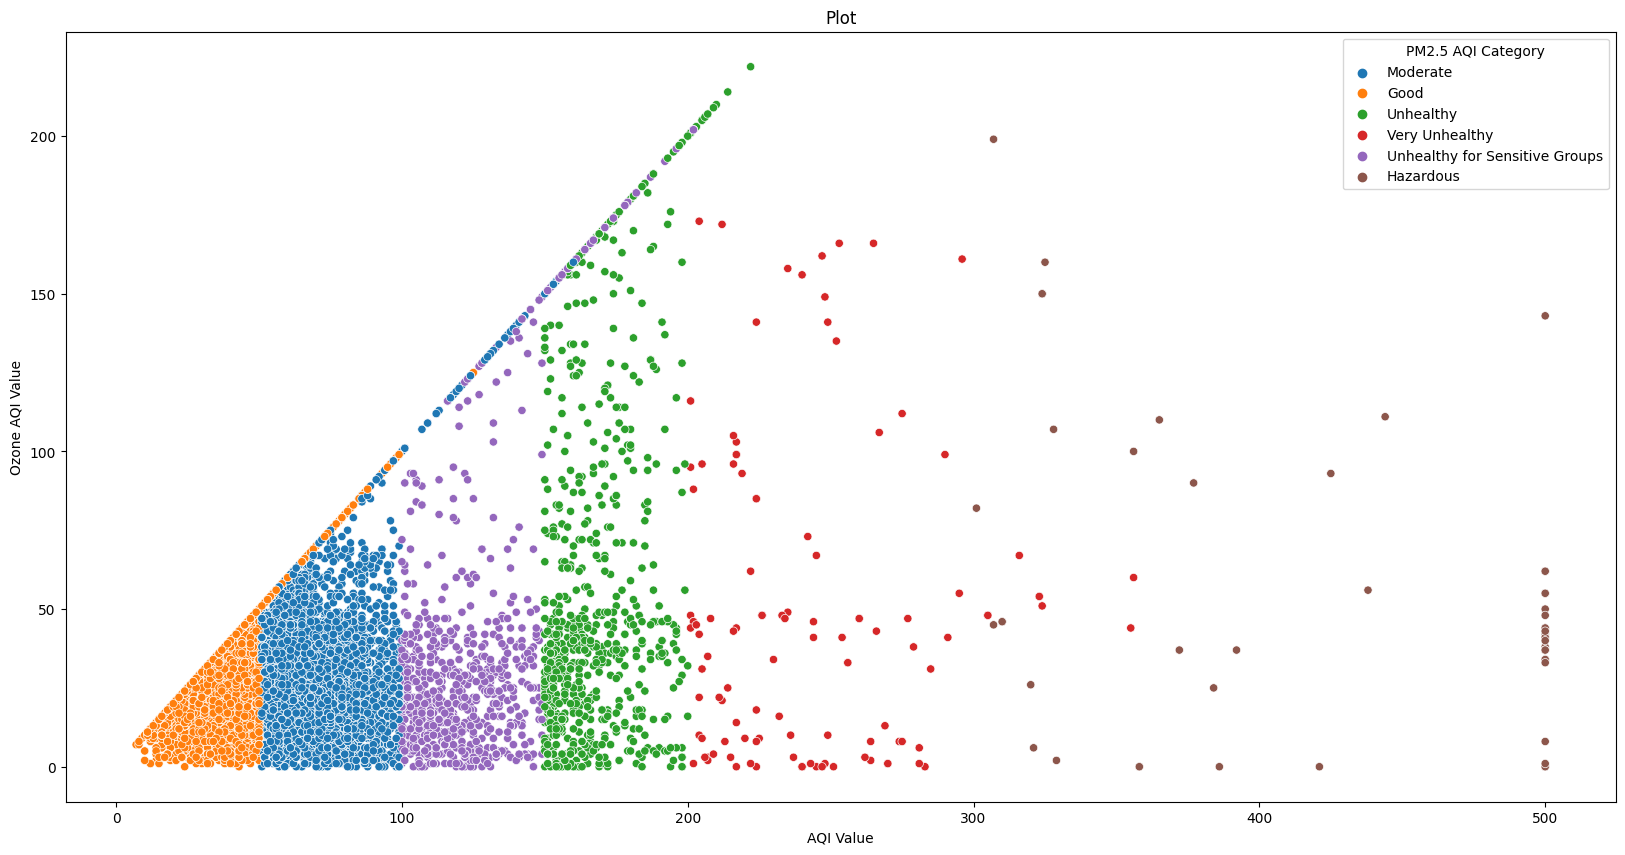

In [129]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=data['AQI Value'], y=data['Ozone AQI Value'], hue='PM2.5 AQI Category', data=data)
plt.title('Plot')

plt.show()

# ****B. UNSUPERVISED LEARNING****

#### **B1. IMPLEMENTASIKAN METODE K-MEANS**

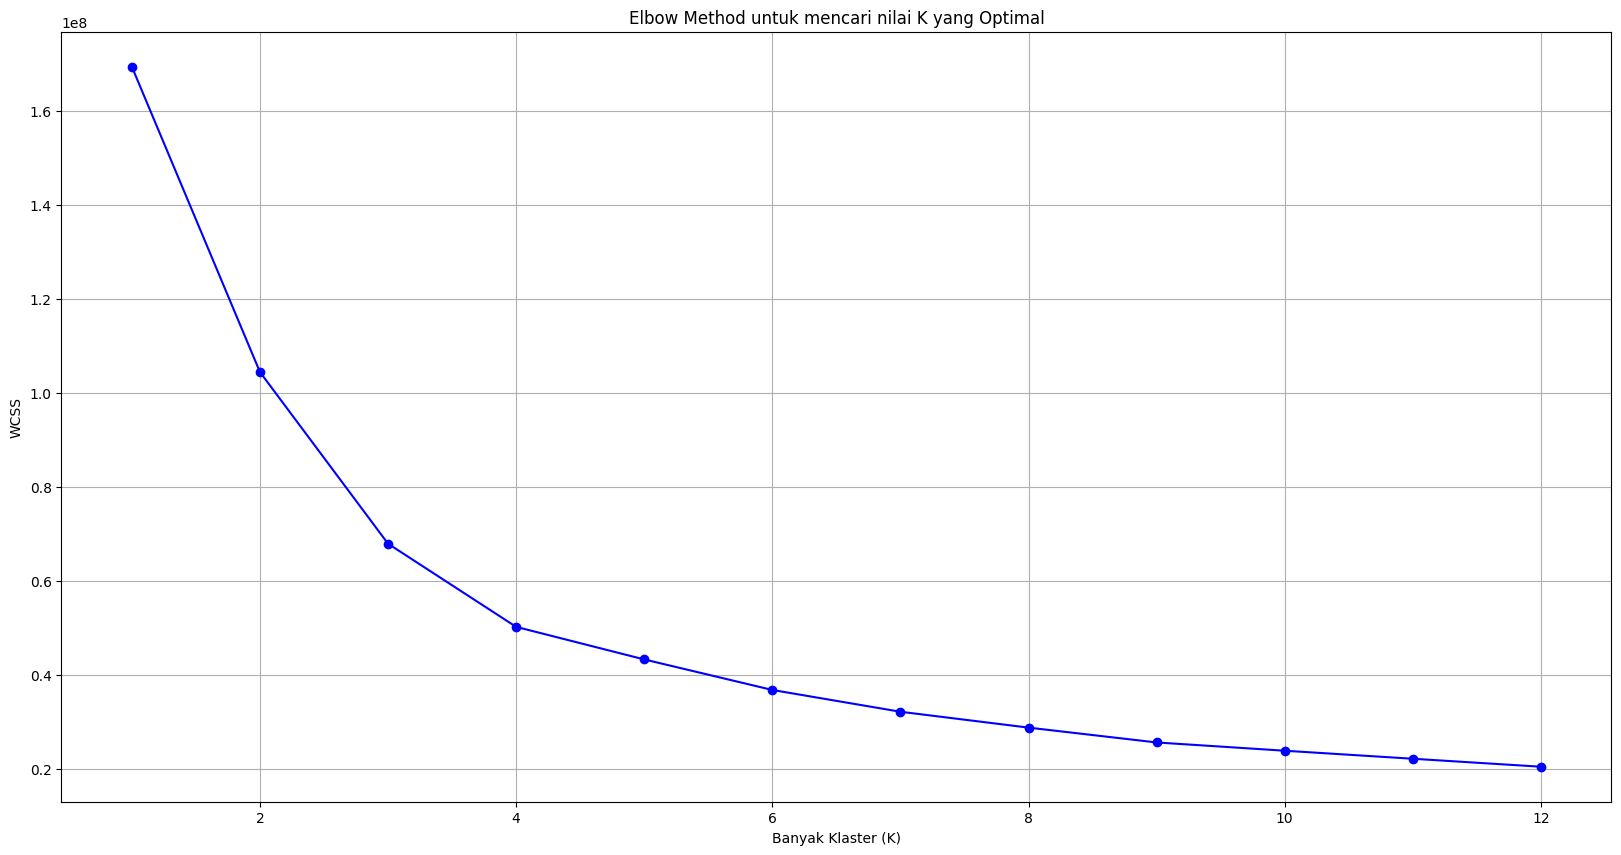

In [130]:
X = data.select_dtypes(['int64' , 'float64']).values
wcss = []

for k in range(1, 13):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

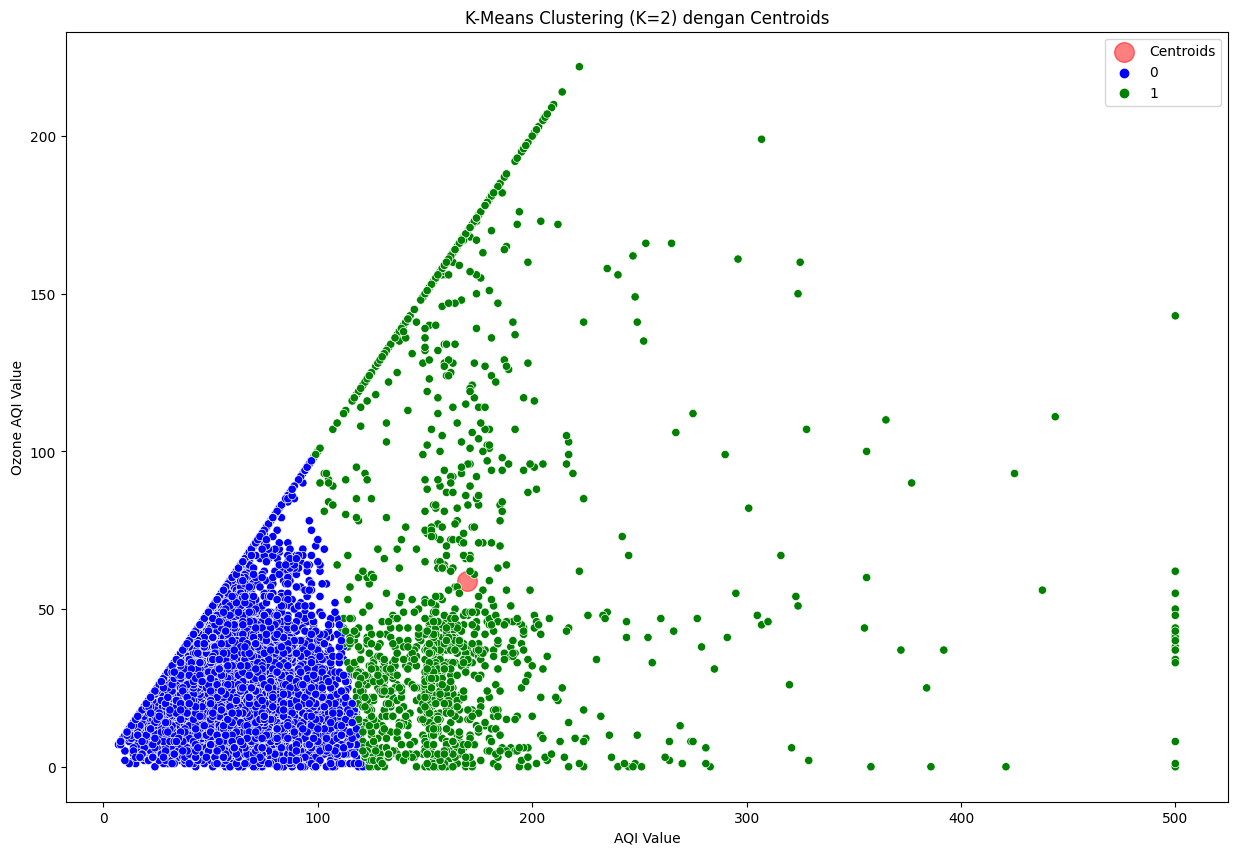

In [131]:
plt.figure(figsize=(15,10))

X = data[["AQI Value" , "Ozone AQI Value" ]]
K = 2 
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
data["clusters"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
warna = ["blue", "green"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=200,label='Centroids')

sns.scatterplot(data=data, x="AQI Value", y="Ozone AQI Value", hue="clusters", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("AQI Value")
plt.ylabel("Ozone AQI Value")
plt.legend()
plt.show()

#### **B2. EVALUASI CLUSTERING TANPA LABEL DAN DENGAN LABEL**

##### **TANPA LABEL**

In [132]:
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.73
Davies-Bouldin Index: 0.70
Calinski-Harabasz Index: 18385.68


##### **DENGAN LABEL**

In [143]:
from sklearn.metrics import adjusted_rand_score

# Data
X = data[['AQI Value', 'Ozone AQI Value']]
k = 6  # Jumlah cluster yang diinginkan
model = KMeans(n_clusters=k)
cluster_labels = model.fit_predict(X)

true_labels =  data['PM2.5 AQI Category'].values.flatten()
ari = adjusted_rand_score(true_labels, cluster_labels)
print("Adjusted Rand Score:", ari)

Adjusted Rand Score: 0.4384333476370492


C:\Users\M. ARIANDA SAPUTRA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### **B3. PLOT CLUSTERING**

In [ ]:
# Data
X = data[['AQI Value', 'Ozone AQI Value']]
k = 3  # Jumlah cluster yang diinginkan
model = KMeans(n_clusters=k)
cluster_labels = model.fit_predict(X)

# Plot data yang telah di-cluster
plt.scatter(X['AQI Value'], X['Ozone AQI Value'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('AQI Value')
plt.ylabel('Ozone AQI Value')
plt.show()

C:\Users\M. ARIANDA SAPUTRA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


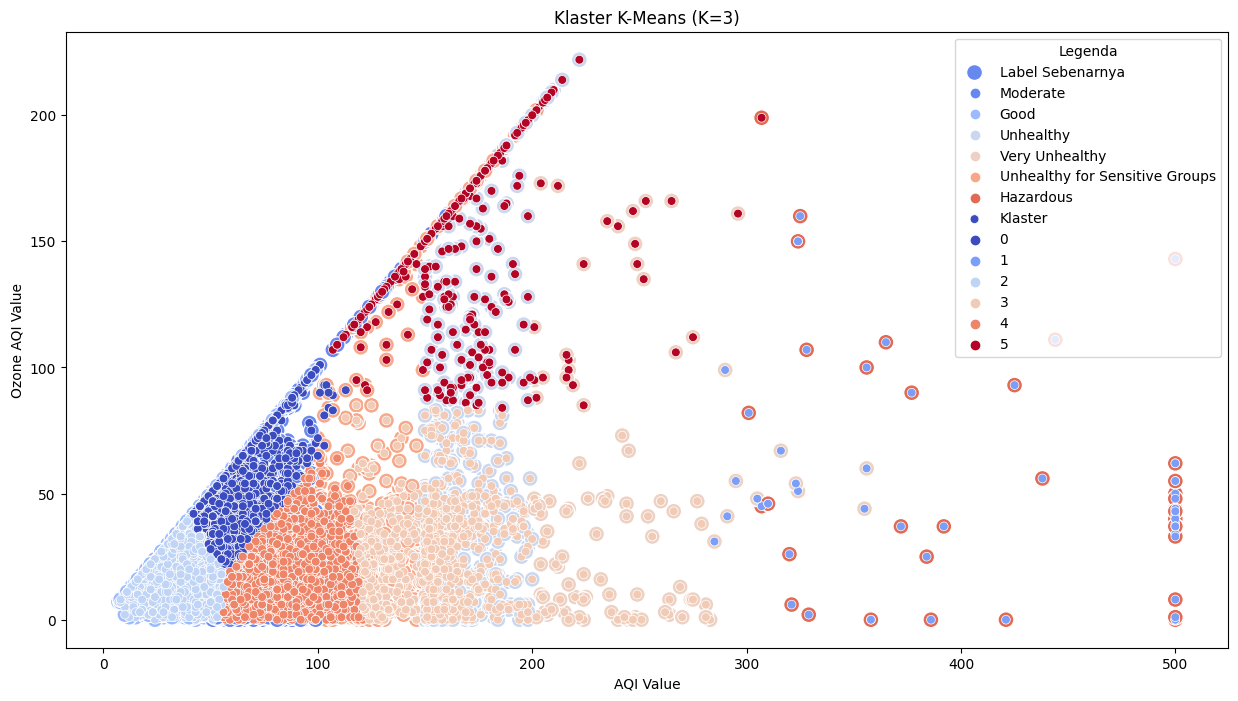

In [147]:
X = data[['AQI Value', 'Ozone AQI Value']]
k = 6  
model = KMeans(n_clusters=k)
cluster_labels = model.fit_predict(X)

pemetaan_klaster = {0: 3, 2: 0, 4: 2}
data["klaster2"] = cluster_labels  
plt.figure(figsize=(15, 8))


sns.scatterplot(data=data, x="AQI Value", y="Ozone AQI Value",
                hue="PM2.5 AQI Category", marker="o", s=130, palette="coolwarm", label="Label Sebenarnya")
sns.scatterplot(data=data, x="AQI Value", y="Ozone AQI Value",
                hue="klaster2", marker="o", s=40, palette="coolwarm", label="Klaster")
plt.title("Klaster K-Means (K=3)")
plt.xlabel("AQI Value")
plt.ylabel("Ozone AQI Value")
plt.legend(title="Legenda", loc="upper right")
plt.show()